In [61]:
# Libraries
# ==============================================================================
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from skforecast.ForecasterAutoregMultiVariate import ForecasterAutoregMultiVariate
from skforecast.model_selection_multiseries import backtesting_forecaster_multiseries
from skforecast.model_selection_multiseries import grid_search_forecaster_multiseries
from skforecast.model_selection_multiseries import random_search_forecaster_multiseries

In [62]:
# Data download
# ==============================================================================
data = pd.read_csv('mydata.csv')

# Data preparation
# ==============================================================================
data = data.set_index('date')
# data = data.asfreq('D')
data = data.sort_index()
data = data[['open','high','low','close','volume']]
data.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,235.779999,237.070007,232.809998,235.639999,2931000
2018-01-03,235.070007,235.729996,233.289993,235.630005,2193700
2018-01-04,237.000000,239.440002,236.470001,238.710007,2243100
2018-01-05,238.649994,240.899994,237.740005,240.570007,1835900
2018-01-08,239.380005,240.940002,239.179993,239.789993,1869000


In [63]:
# Split data into train-val-test
# ==============================================================================
steps = 50
data_train = data[:-steps]
data_test  = data[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

Train dates : 2018-01-02 --- 2022-02-22  (n=1043)
Test dates  : 2022-02-23 --- 2022-05-04  (n=50)


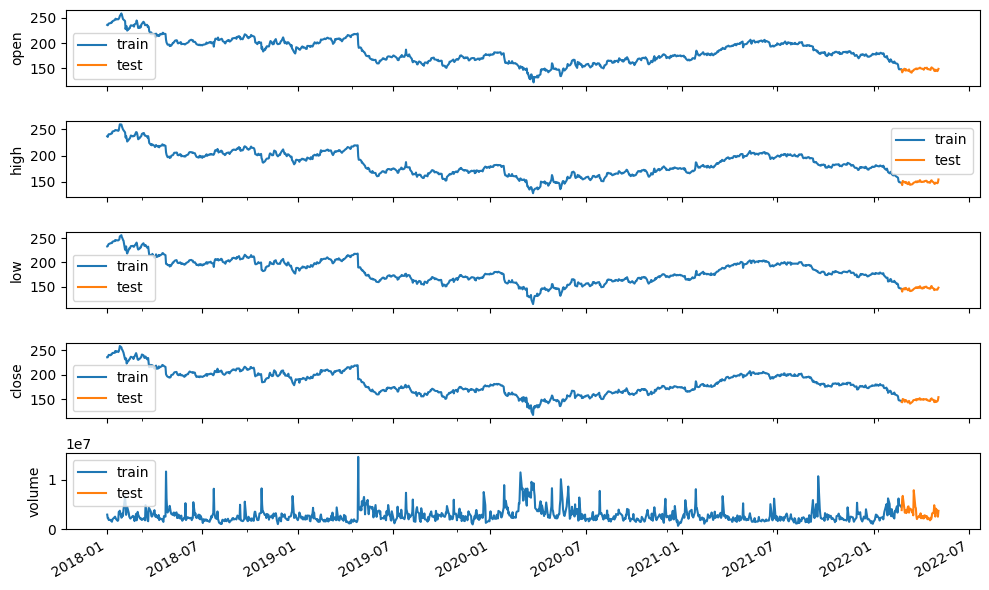

In [64]:
# Plot time series
# ==============================================================================
data_train.index = pd.to_datetime(data_train.index)
data_test.index = pd.to_datetime(data_test.index)
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(10, 6), sharex=True)
feature = ['open','high','low','close','volume']
for i in range(5):
    data_train[feature[i]].plot(label='train', ax=axes[i])
    data_test[feature[i]].plot(label='test', ax=axes[i])
    axes[i].set_xlabel('')
    axes[i].set_ylabel(feature[i])
    axes[i].legend()

fig.tight_layout()
plt.show()

In [65]:
# Create and fit forecaster MultiVariate
# ==============================================================================
forecaster = ForecasterAutoregMultiVariate(
                 regressor          = RandomForestRegressor(random_state=123),
                 level              = 'close',
                 lags               = steps,
                 steps              = steps,
                 transformer_series = {'open': StandardScaler(), 'high': StandardScaler(), 'low': StandardScaler(), 'volume': StandardScaler()},
                 transformer_exog   = None,
                 weight_func        = None
             )
forecaster.fit(series=data_train)
forecaster

d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\ForecasterAutoregMultiVariate\ForecasterAutoregMultiVariate.py:478: UserWarning: {'close'} not present in `transformer_series`. No transformation is applied to these series.
  warnings.warn(
d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:616: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:616: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:616: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:616: UserWarning: `y` has DatetimeIndex index but n

ForecasterAutoregMultiVariate 
Regressor: RandomForestRegressor(random_state=123) 
Lags: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50] 
Transformer for series: {'open': StandardScaler(), 'high': StandardScaler(), 'low': StandardScaler(), 'volume': StandardScaler()} 
Transformer for exog: None 
Weight function included: False 
Window size: 50 
Target series, level: close 
Multivariate series (names): ['open', 'high', 'low', 'close', 'volume'] 
Maximum steps predicted: 50 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 1042] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_

In [66]:
# Predict MultiVariate
# ==============================================================================
predictions = forecaster.predict(steps=steps)

d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:674: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:674: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:674: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:674: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
d:\Conda\envs\py38torchforecast\lib\site-packages\skforecast\utils\utils.py:674: UserWarning: `last_window` has DatetimeIndex index 

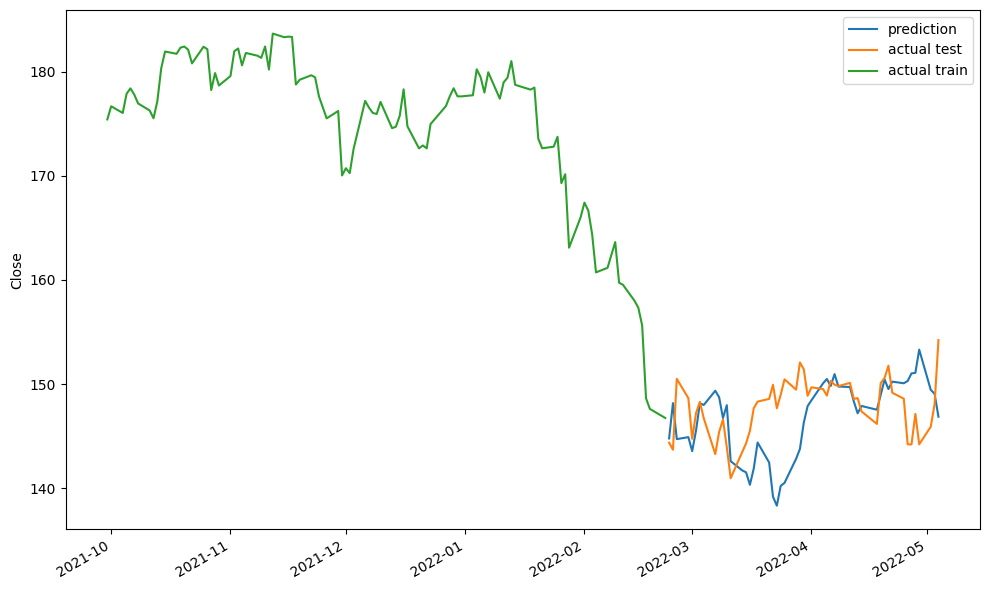

In [67]:
# Plot time series
# ==============================================================================
data_train_plot  = data_train[-100:]
predictions.index = pd.to_datetime(data_test.index)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 6), sharex=True)
predictions['close'].plot(label='prediction', ax=ax)
data_test['close'].plot(label='actual test', ax=ax)
data_train_plot['close'].plot(label='actual train', ax=ax)
ax.set_xlabel('')
ax.set_ylabel('Close')
ax.legend()

fig.tight_layout()
plt.show()